In [1]:
from fuzzyART_gai import *
from kit_handy import *
from kit_painting import *
import matplotlib.pyplot as plt

In [2]:
alldata, label_true = load_data('gaussian2d') #  'iris') #
pca_painter = PaintPCA(alldata)
feat_num = alldata.shape[1]

No PCA performed


Category 0 is too small
Directory  _simcache/frames_2022-05-05_11-54-00  Created 
figure saved at _simcache/frames_2022-05-05_11-54-00/2022-05-05_11-54-00_var_rho60[1651748040366957]
Category 0 is too small
Category 1 is too small
figure saved at _simcache/frames_2022-05-05_11-54-00/2022-05-05_11-54-00_var_rho60[1651748040501860]
Category 1 is too small
figure saved at _simcache/frames_2022-05-05_11-54-00/2022-05-05_11-54-00_var_rho60[1651748040620188]
Category 1 is too small
figure saved at _simcache/frames_2022-05-05_11-54-00/2022-05-05_11-54-00_var_rho60[1651748040751879]
figure saved at _simcache/frames_2022-05-05_11-54-00/2022-05-05_11-54-00_var_rho60[1651748040876750]
figure saved at _simcache/frames_2022-05-05_11-54-00/2022-05-05_11-54-00_var_rho60[1651748040995369]
figure saved at _simcache/frames_2022-05-05_11-54-00/2022-05-05_11-54-01_var_rho60[1651748041133784]
figure saved at _simcache/frames_2022-05-05_11-54-00/2022-05-05_11-54-01_var_rho60[1651748041250919]
figure saved a

figure saved at _simcache/frames_2022-05-05_11-54-00/2022-05-05_11-54-10_var_rho60[1651748050714705]
figure saved at _simcache/frames_2022-05-05_11-54-00/2022-05-05_11-54-10_var_rho60[1651748050846373]
figure saved at _simcache/frames_2022-05-05_11-54-00/2022-05-05_11-54-10_var_rho60[1651748050978893]
figure saved at _simcache/frames_2022-05-05_11-54-00/2022-05-05_11-54-11_var_rho60[1651748051110422]
figure saved at _simcache/frames_2022-05-05_11-54-00/2022-05-05_11-54-11_var_rho60[1651748051242241]
figure saved at _simcache/frames_2022-05-05_11-54-00/2022-05-05_11-54-11_var_rho60[1651748051373892]
figure saved at _simcache/frames_2022-05-05_11-54-00/2022-05-05_11-54-11_var_rho60[1651748051499431]
figure saved at _simcache/frames_2022-05-05_11-54-00/2022-05-05_11-54-11_var_rho60[1651748051624547]
figure saved at _simcache/frames_2022-05-05_11-54-00/2022-05-05_11-54-11_var_rho60[1651748051758459]
figure saved at _simcache/frames_2022-05-05_11-54-00/2022-05-05_11-54-11_var_rho60[16517480

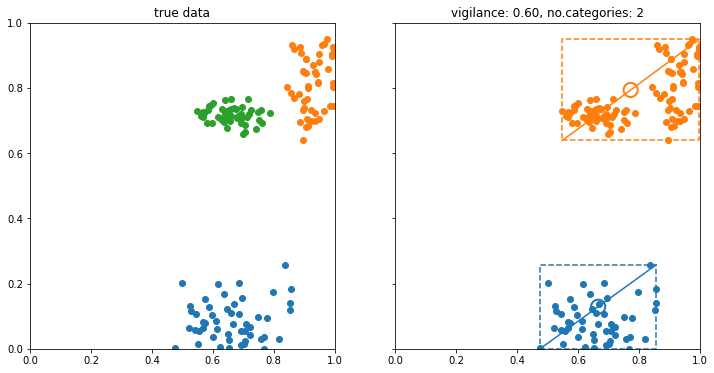

In [3]:
now = timestamp()[0]
np.random.shuffle(alldata)

no_epoch = 3
fig, axs = plt.subplots(1, 2,
                        figsize = (12, 6), sharex=True, sharey=True)
#fig.tight_layout()

# plot true data
pca_painter.scatter(axs[0], label_true)
axs[0].set_title("true data")
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)

# init
rho=0.6
net = FuzzyART(feat_num, alpha=1, gamma=.00001, rho=rho, best_match_num=3)
    
ax = axs[1]
for data in alldata.reshape(-1, 1, 2):
    ax.cla()
    new_sample = [a.scatter(*data[0], color='k', marker='x', s=666) for a in axs]
    # train
    net.train(data) # each epoch, all data is shuffled
    label_predall = net.test(alldata)
    label_pred = label_predall[:, 0].astype(int)

    # plot
    # pred
    pca_painter.scatter(ax, label_pred, alldata)
    
    # bipole and centre
    pca_painter.tripole(ax, *net.getcat_bipole())
    
    # boundary    
    ax.set_prop_cycle(None)
    pca_painter.boundary(ax, net.getcat_vertex())
    
    # info
    cat_number = net.w.shape[0]
    ax.set_title('vigilance: {:.2f}, no.categories: {}'.format(rho, cat_number))
    
   
    # save fig
    simname = 'var_rho{:d}'.format(int(rho*100))
    dirname = '_simcache/frames_{}'.format(now)
    savefigure_datetime(fig, simname, dirname)
    
    [ns.remove() for ns in new_sample]

